https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [2]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

In [3]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [4]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [5]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [6]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [57]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [58]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [59]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))


   Survived  Pclass  Sex   Age     Fare  Embarked  IsAlone  Title
0         0       3    1  22.0   7.2500       0.0        0      1
1         1       1    0  38.0  71.2833       1.0        0      3
2         1       3    0  26.0   7.9250       0.0        1      2
3         1       1    0  35.0  53.1000       0.0        0      3
4         0       3    1  35.0   8.0500       0.0        1      1
5         0       3    1   NaN   8.4583       2.0        1      1
6         0       1    1  54.0  51.8625       0.0        1      1
7         0       3    1   2.0  21.0750       0.0        0      4
8         1       3    0  27.0  11.1333       0.0        0      3
9         1       2    0  14.0  30.0708       1.0        0      3


In [61]:
train.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,889.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.362205,0.602694,1.728395
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.636157,0.489615,1.030039
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,1.000000,5.000000


In [63]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 379kB/s eta 0:00:01


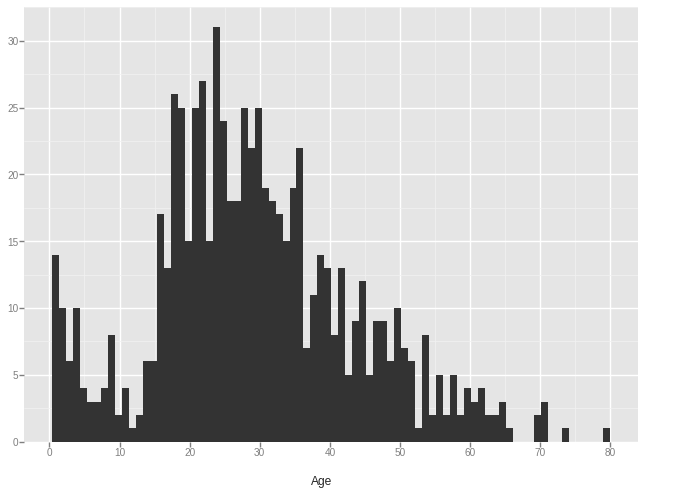

<ggplot: (-9223363308233933852)>

In [75]:
from ggplot import *
ggplot(train, aes(x = 'Age')) + geom_histogram(bins = 80)

In [78]:
import pystan
d_code = '''
data {
  int<lower=0> N;
  vector[N] height;
  vector[N] weight;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(178,100);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,50);

  height ~ normal(alpha + beta * weight, sigma);
}
'''